In [ ]:
$ roslaunch turtlebot_gazebo turtlebot_world.launch

In [ ]:
$ rosrun rqt_graph rqt_graph

# **Week 3: Localization**

# **3.1 Localization theory**

* We will take a look at some different localization methods.

*  We distinguish between local and global methods.

## **1. Where	are	we?**

* Localization methods are grouped into two categories: **Global and Local.**



**`Global:`**

1. Give a **location with respect to the world**

2. Often **inaccurate** compared to local methods

3. For example: **GPS** or Wi-Fi hotspots


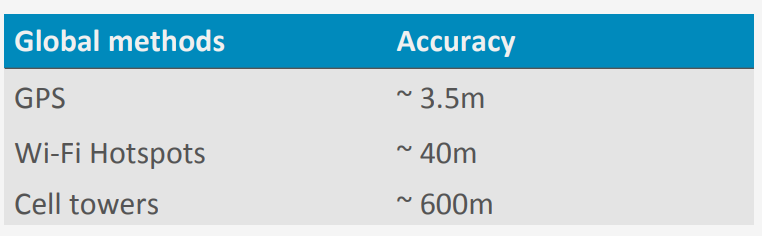

*  Global methods of locatization could tell you how far you have walked, rather than how close you are to the edge. 

## **2. Local	methods**

1. Give a **location with respect to local sensor feedback**

2. Can be **highly accurate** compared to global methods

3. For example: **laser scanner** and on-board cameras

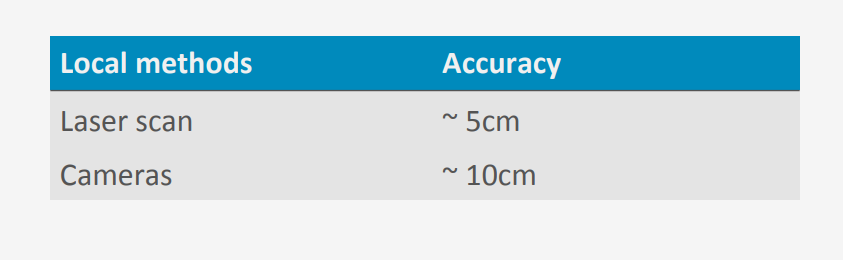

## **`Question 1 :` Accurate localization**

* In general, which type of localization is more accurate: local or global methods?.


```
1. Local methods

2. Global Methods
```

* **Ans : 1**

## **`Question 2 :` Global localization**

* In which of the following scenarios would a global localization method be more useful?


```
1. You are lost in the woods and you want to find out where you are.

2. You want to park your car in a parking spot.

3. You are walking alongside a cliff and you are paying attention in order not to fall
```

* **Ans : 1**

# **3.2 Map registration**

* Sometimes **global localization** methods can not give accurate enough results to localize a robot in a map.







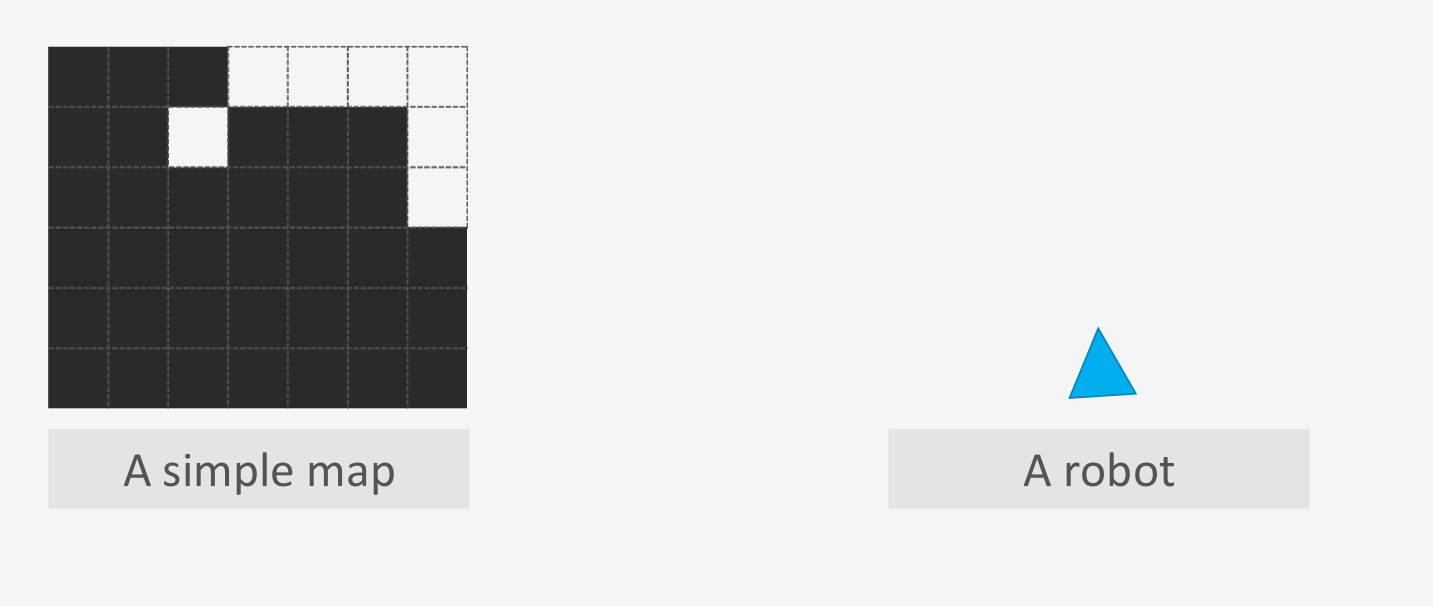

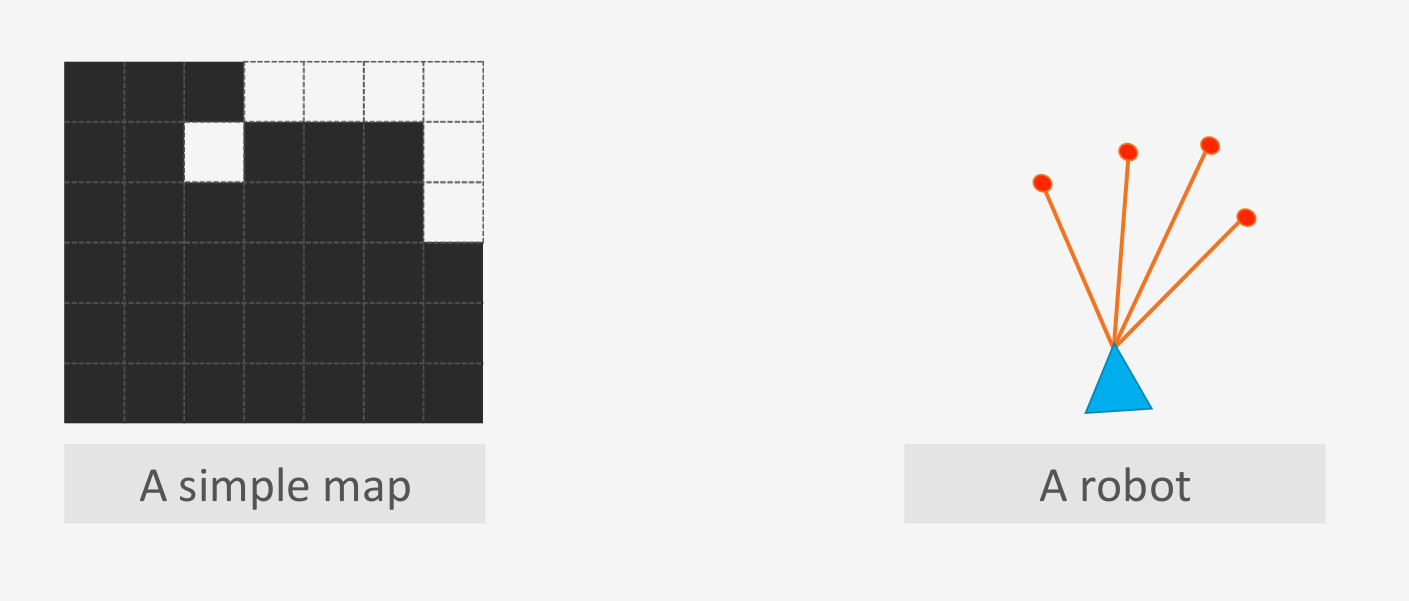

* **Local sensor readings** can give **accurate positioning with respect to obstacles** in the map, but there may be **multiple places on the map that look the same.**

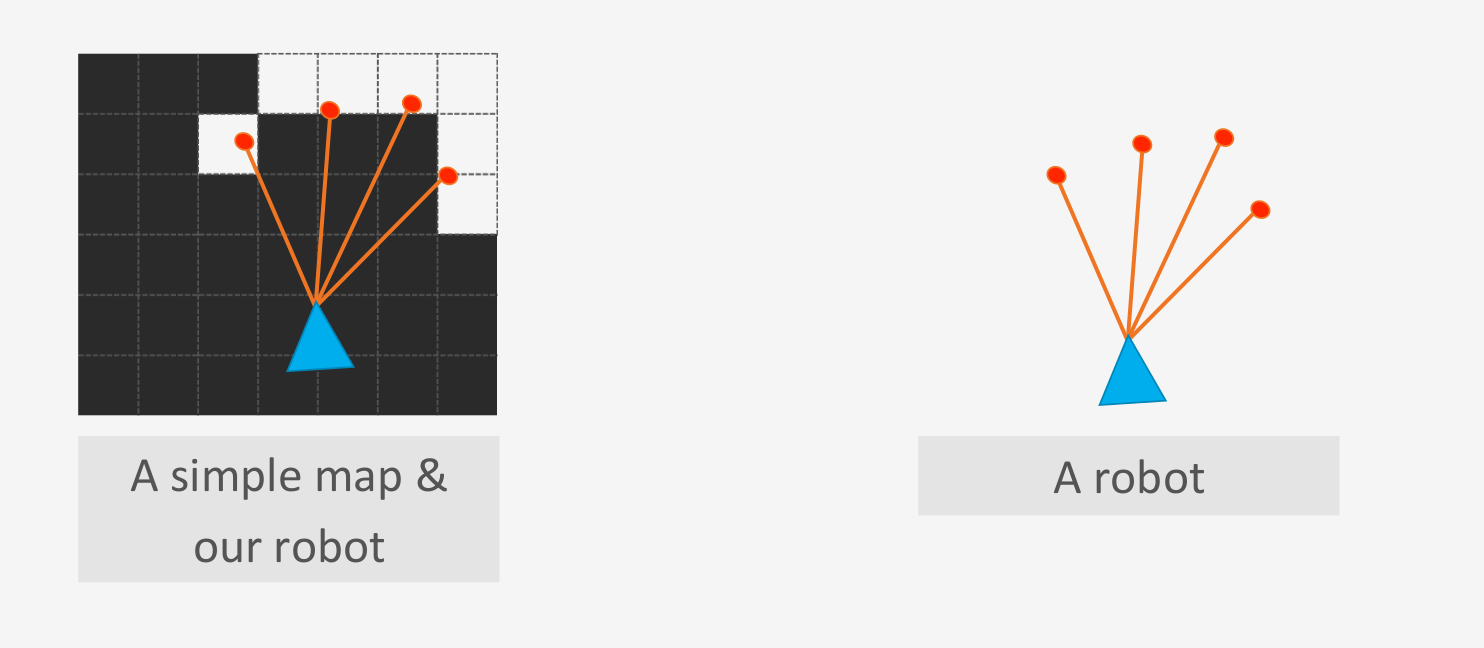

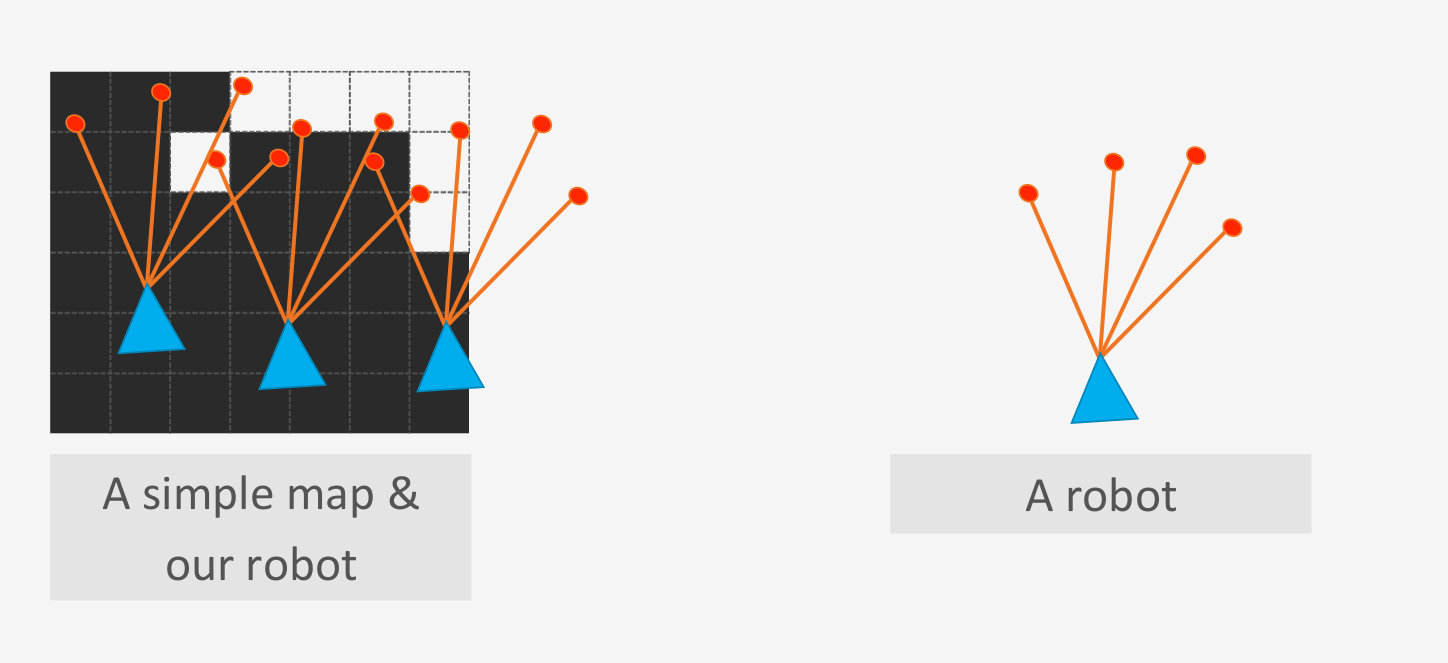

* **Location** can be **narrowed** **down** by **estimating a range of positions a robot** is likely to be by **tracking how much the robot moves and by taking many measurements.**

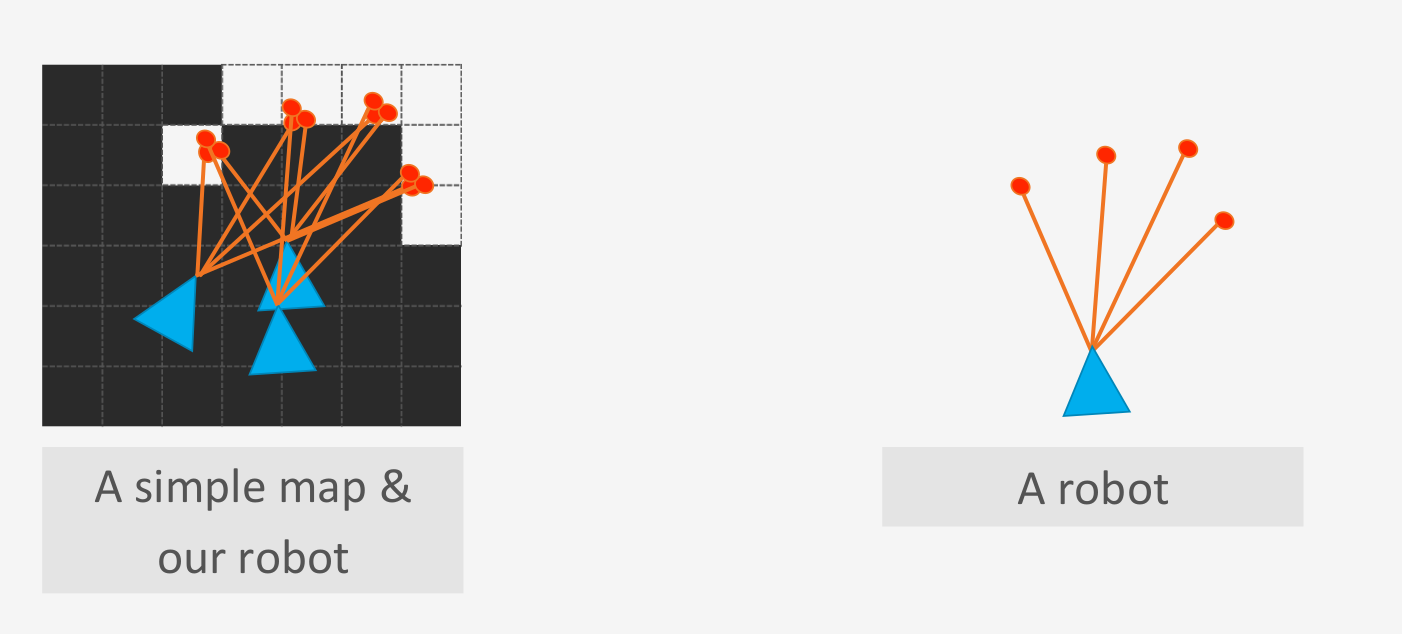

## **`Question 1 :` Robot's position in Map**

* What can you do to be more certain of a robot's position in an environment?


```
1. Stop moving and take lots of measurements

2. Take several measurements and keep track of how much the robot has moved

3. Only use a global method of localization
```

* **Ans : 2**

# **3.3 Mapping and Localization Tutorial**

*  What you should get when following the **mapping assignments**. 

* The written **mapping tutorial.**

*  At last there will be a tutorial about **localization**. 


## **1. Mapping Tutorial**

 * In this tutorial you will be guided to map the **`TurtleBot_world`** using **`gmapping`**. 


#### **`Step 1:`**  Start our Gazebo simulation.

In [ ]:
$ roslaunch turtlebot_gazebo turtlebot_world.launch

#### **`Step 2:`** View active ROS nodes.

In [ ]:
$ rosnode list



```
/bumper2pointcloud
/cmd_vel_mux
/depthimage_to_laserscan
/gazebo
/gazebo_gui
/laserscan_nodelet_manager
/mobile_base_nodelet_manager
/robot_state_publisher
/rosout

```



#### **`Step 3:`** Start **`gmapping_demo`** launch 

* Remember that gmapping is a specific **SLAM** implementation.

In [ ]:
$ roslaunch turtlebot_gazebo gmapping_demo.launch

#### **`Step 4:`** View the active ROS nodes.



```
/slam_gmapping
```



In [ ]:
$ rosnode info /slam_gmapping

```
Node [/slam_gmapping]
Publications: 
 * /map [nav_msgs/OccupancyGrid]
 * /map_metadata [nav_msgs/MapMetaData]
 * /rosout [rosgraph_msgs/Log]
 * /slam_gmapping/entropy [std_msgs/Float64]
 * /tf [tf2_msgs/TFMessage]

Subscriptions: 
 * /clock [rosgraph_msgs/Clock]
 * /scan [sensor_msgs/LaserScan]
 * /tf [tf2_msgs/TFMessage]
 * /tf_static [tf2_msgs/TFMessage]

Services: 
 * /dynamic_map
 * /slam_gmapping/get_loggers
 * /slam_gmapping/set_logger_level
```



* Under subscription we can see **`/scan`**, through which the this **nodes receive the information gathered by the laser scanner.**

* We also see this **node is publishing** to the **map topic** of the environment as expected.



#### **`Step 5:`** View the map in rviz. 

In [ ]:
$ roslaunch turtlebot_rviz_launchers view_navigation.launch

* To make everything clearer, you will need to change some settings.

```
1. Set LaserScan/size(m) to 0.06

2. Set LaserScan/style to 'flat squares'

3. Set Localmap/Costmap/Topic to /map

4. Set Globalmap/Costmap/Topic to /map
```




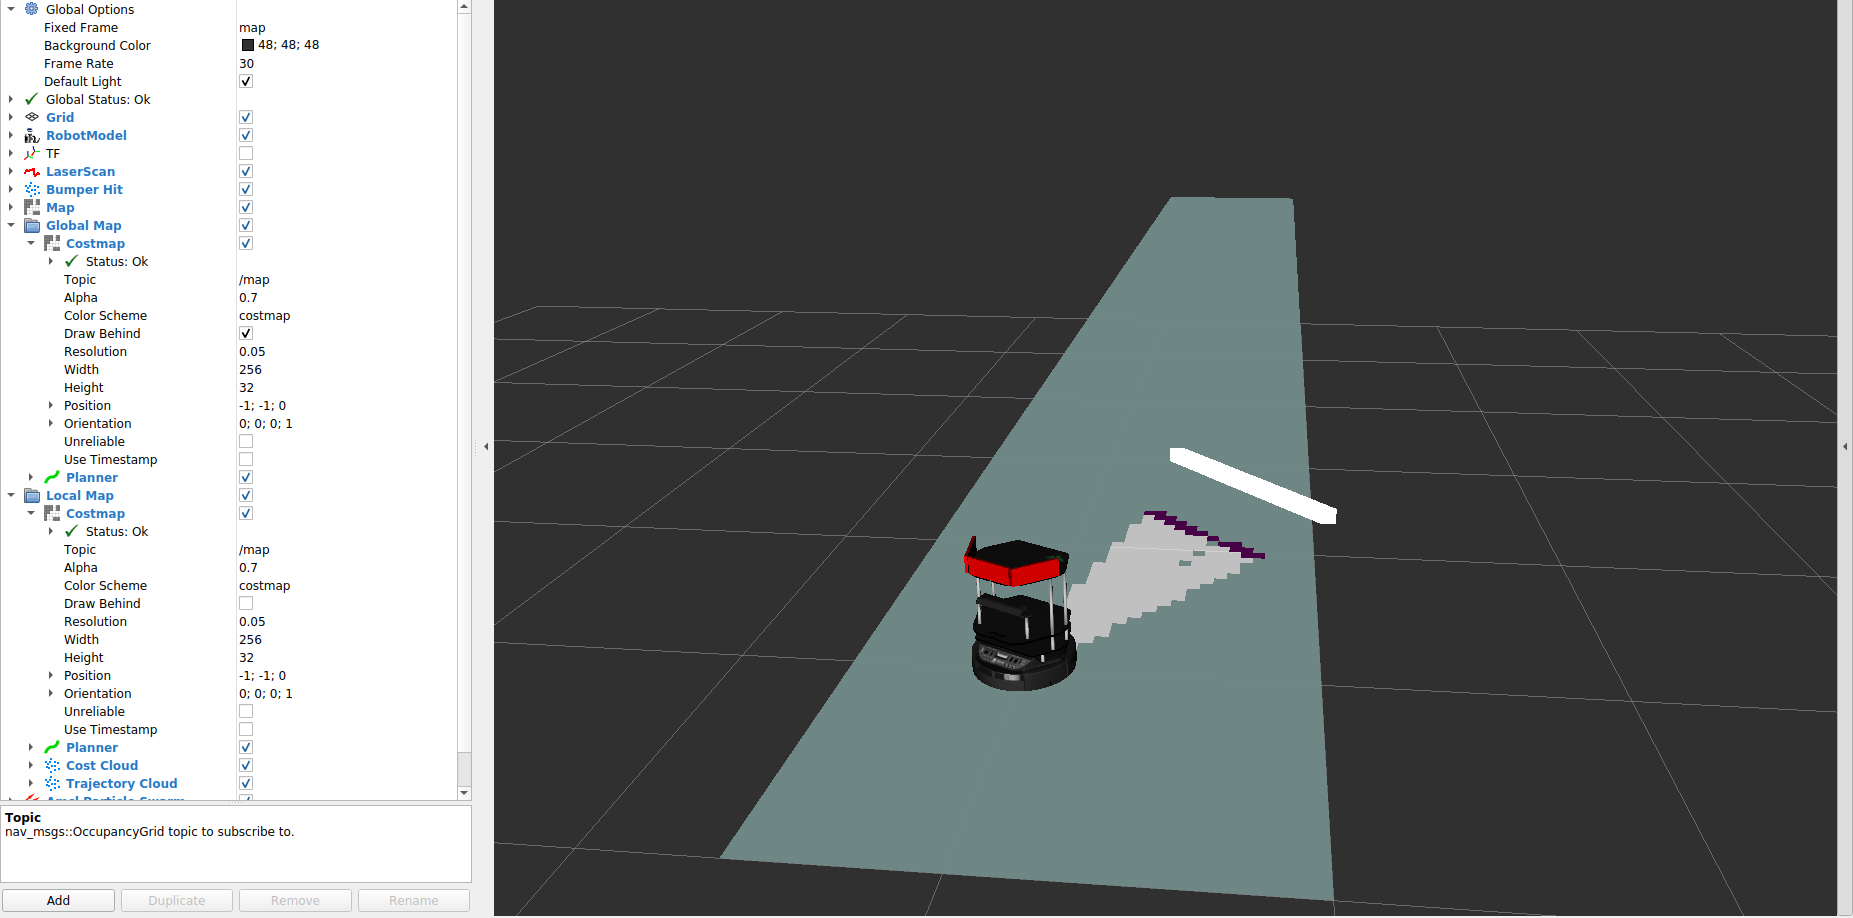

#### **`Step 6:`** To map, start teleoperation.

In [ ]:
$ roslaunch turtlebot_teleop keyboard_teleop.launch

In [ ]:
$ rosrun map_server map_saver -f $HOME/<choose a directory>/test_map



```
test_map.pgm
test_map.yaml
```



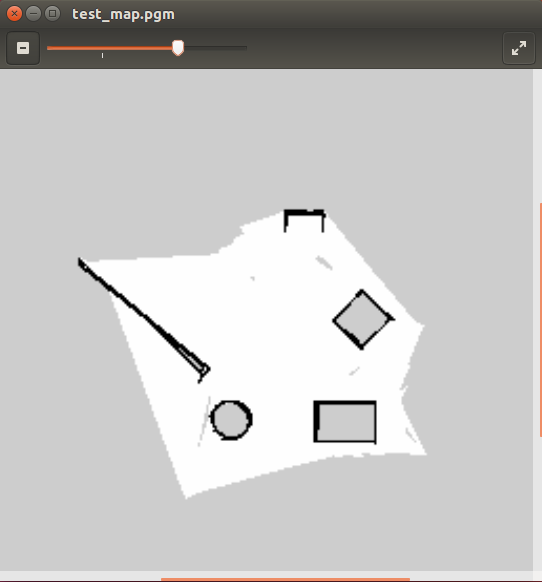

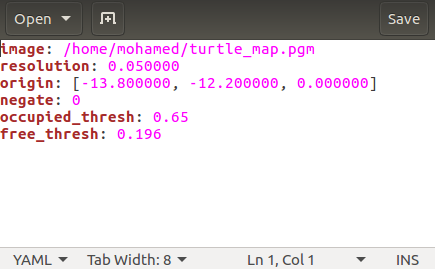

## **2. Localization Tutorial**
 

#### **`Step 1:`**  Start our Gazebo simulation.

In [ ]:
$ roslaunch turtlebot_gazebo turtlebot_world.launch

#### **`Step 2:`**  Start amcl node.

In [ ]:
$ roslaunch turtlebot_gazebo amcl_demo.launch map_file:=$HOME/<directory of map>/test_map.yaml

map_file:=$HOME/test_map.yaml

#### **`Step 3:`**  Start rviz for visualize 

In [ ]:
$ roslaunch turtlebot_rviz_launchers view_navigation.launch

* **Remember** from the lecture, we can have an **absolute position on the map** if we use a global method of localization.

* However, with local method localization can be obtained only by moving the robot around first and taking more measurements.

*  The robot will start of somewhere random on the map view in RViz with something similar to the following.

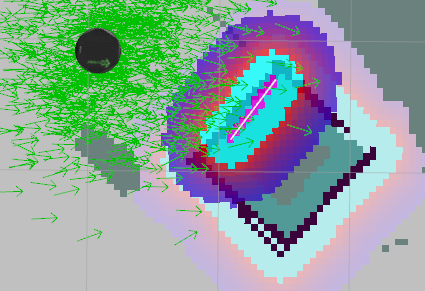

 * The round black circle is the TurtleBot. 
 
 * It's surrounded by green arrows which are **probabilistic estimates of its actual position.**
 
 * Pretty much like the blue squares you saw in the lecture slides.

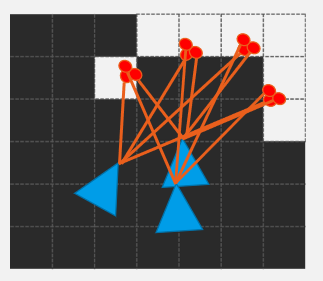

In [ ]:
$ roslaunch turtlebot_teleop keyboard_teleop.launch

Since we get more certainty about where the robot is, the arrows should come close and closer indicating more a more **accurate probabilistic model**. 

#### **`Step 4:`**  **Localize** it better 

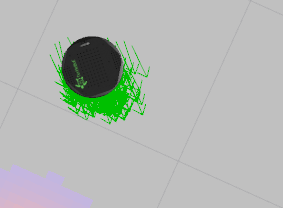

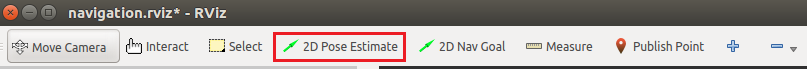